In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# #put inpace=True, will change the original data set df. Send nothing to 'data'

In [ ]:
data=df.drop(['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Pclass','Name'],axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [ ]:
data.shape

(891, 3)

In [ ]:
data['Sex'].unique() #check all the objects in gender column

array(['male', 'female'], dtype=object)

In [ ]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
data['Age'].isna().sum()

np.int64(177)

In [ ]:
#data['gender'].replace({'male':1,'female':0})  #,inplace=True)
data['Sex']=data['Sex'].map({'male':1,'female':0})

In [ ]:
data.head()

,Survived,Sex,Age
0,0,1,22.0
1,1,0,38.0
2,1,0,26.0
3,1,0,35.0
4,0,1,35.0


In [ ]:
data.isna().sum()

,0
Survived,0
Sex,0
Age,177


In [ ]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [ ]:
data.describe()
#data.describe()

,Survived,Sex,Age
count,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.699118
std,0.486592,0.477990,13.002015
min,0.000000,0.000000,0.420000
25%,0.000000,0.000000,22.000000
50%,0.000000,1.000000,29.699118
75%,1.000000,1.000000,35.000000
max,1.000000,1.000000,80.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['Survived'].value_counts()  #Data is Balanced

,count
Survived,
0,549
1,342


Text(0.5, 1.0, 'survive count')

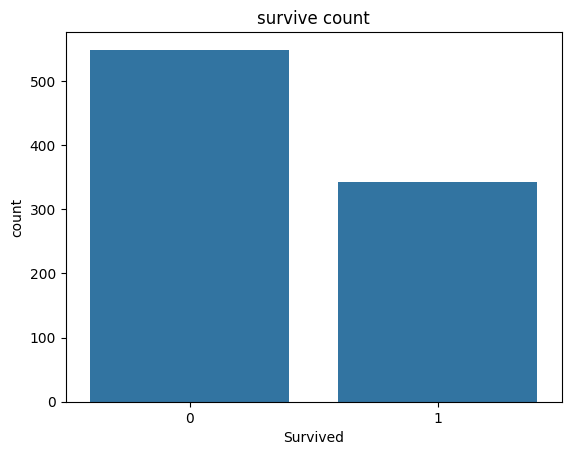

In [ ]:
sns.countplot(data,x='Survived')  #Very important for BALANACE DATA
plt.title('survive count')

THis figure shows that out of 549(0,dead) catagory approx 90s are from female. similarly, out pf 342(1:alive) catagory approx 100 from male.

Text(0.5, 1.0, 'survive by gender')

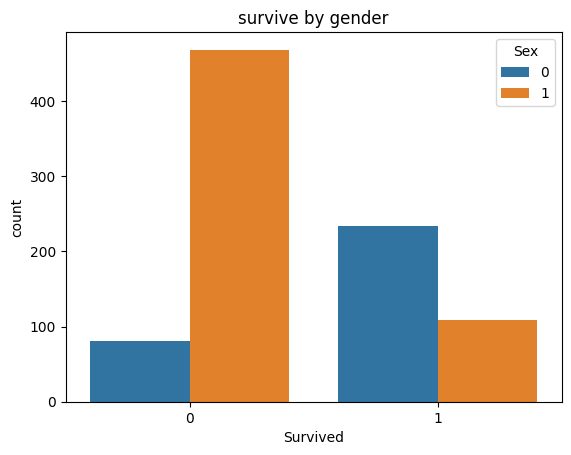

In [ ]:
sns.countplot(data,x='Survived',hue='Sex') #the hue parameter is used to add a categorical variable to the plot that will determine the color of the plotted elements.
plt.title('survive by gender')

Text(0.5, 1.0, 'Age distribution')

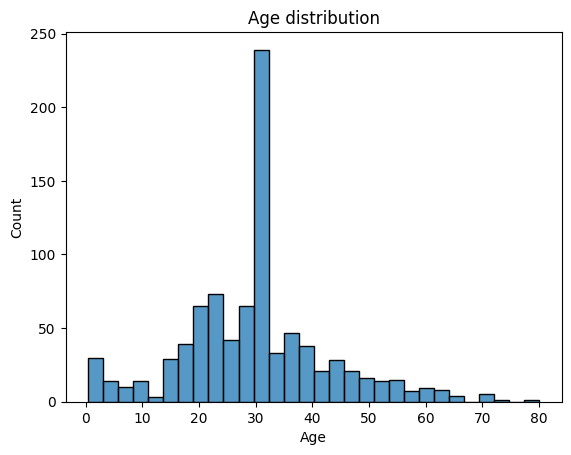

In [ ]:
sns.histplot(data,x='Age')
plt.title('Age distribution')

<Axes: >

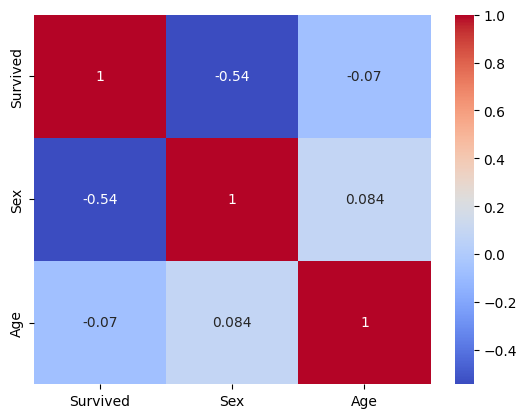

In [ ]:
#sns.heatmap(df.corr(),annot=True)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
data.head()

,Survived,Sex,Age
0,0,1,22.0
1,1,0,38.0
2,1,0,26.0
3,1,0,35.0
4,0,1,35.0


In [ ]:
x=data[['Sex','Age']]
#x_train=data.drop['Survived']
y=data['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
model=LogisticRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7318435754189944

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [ ]:
model1=SVC()

In [ ]:
model1.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6089385474860335

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7206703910614525

In [ ]:
confusion_matrix(y_test,y_pred)

array([[96, 14],
       [36, 33]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.87      0.79       110\n           1       0.70      0.48      0.57        69\n\n    accuracy                           0.72       179\n   macro avg       0.71      0.68      0.68       179\nweighted avg       0.72      0.72      0.71       179\n'

# SAME CODE WITH FEATURE SELECTION

In [ ]:
data.isna().sum()

,0
Survived,0
Sex,0
Age,0


In [ ]:
data['Embarked']=data['Embarked'].map({'S':1, 'C':2, 'Q':3})

KeyError: 'Embarked'

In [ ]:
data.head()

In [ ]:
data['Sex'].unique()

In [ ]:
data['Sex']=data['Sex'].map({'male':1,'female':0})

In [ ]:
data.isna().sum()

In [ ]:
data.dropna(subset=['Embarked'], inplace=True)

In [ ]:
data.head()

In [ ]:
#data.fillna(data['Age'].mean())
data['Age']=data['Age'].fillna(data['Age'].mean())

In [ ]:
#data.drop(columns='Embarked_cleaned',inplace=True)

In [ ]:
data.head()

In [ ]:
data['Survived'].value_counts() #Balance

In [ ]:
sns.countplot(data,x='Survived')
plt.title('survive Distribution')

In [ ]:
sns.countplot(data,x='Survived',hue='Sex')
plt.title('survive by Sex')

In [ ]:
sns.countplot(data,x='Survived',hue='Embarked')

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix')

In [ ]:
x=data.drop(columns='Survived')
y=data['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)